In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import date
import calendar

In [163]:
# importe les données dans un dataframe
birth_df0 = pd.read_csv("birth.csv", sep=",")

# Nettoyage des données

**1. Elimination des naissances dont les données liées à la date sont non renseignées**

In [164]:
print("Nombre total de lignes :", birth_df0.index.size)
print("Nombre de non nul par colonne :",birth_df0.count()) 

# Remarque : "count()" compte seulemeent les valeurs renseignées de chaque colonne contrairement à
# .size, qui compte tout

Nombre total de lignes : 15547
Nombre de non nul par colonne : year      15547
month     15547
day       15067
gender    15547
births    15547
dtype: int64


En comptant les éléments par colonne on s'aperçoit que seuls certains jours ne sont pas renseignés.

Il faut éliminer les lignes correspondantes :

In [183]:
print("Nbe de lignes, avant nettoyage :" , birth_df0.index.size)

# élimination des lignes dont l'année, le mois ou le jour n'est pas renseigné
birth_df1 = birth_df0.dropna(subset = ['year','month','day'], inplace=False)

#index des lignes éliminées
temp = np.array(list(set(birth_df0.index) - set(birth_df1.index)))

# nbe de lignes après triage
print("Nbe de lignes, après nettoyage :", birth_df1.index.size)
print("Nbe de lignes éliminées :", temp.size)

Nbe de lignes, avant nettoyage : 15547
Nbe de lignes, après nettoyage : 15067
Nbe de lignes éliminées : 480


In [191]:
# on garde seulement les lignes dont les jours sont compris entre 1 et 31
cond_d = pd.Series([birth_df1.day.values[i] in range (1,32) for i in range(len(birth_df1.day))], \
                   index = birth_df1.day.index)

birth_df2 = birth_df1.where(cond_d).dropna()

          
#index des lignes éliminées
temp = np.array(list(set(birth_df1.index) - set(birth_df2.index)))

# nbe de lignes après triage
print("Nbe de lignes, après nettoyage :", birth_df2.index.size)
print("Nbe de lignes éliminées :", temp.size)

birth_df0.iloc[temp].head(5)

Nbe de lignes, après nettoyage : 14717
Nbe de lignes éliminées : 350


,year,month,day,gender,births
8195,1979,9,99.0,F,14
8196,1979,9,99.0,M,11
10247,1982,6,99.0,M,2
6179,1977,1,99.0,F,4
4143,1974,5,99.0,F,12


Création d'une nouvelle colonne qui agrège les données jour, mois et année pour en faire des dates

In [193]:
# Crée une dataframe temporaire contenant les données pour former les dates
date_df = pd.DataFrame({'year':birth_df2.year.values.astype(int),\
                        'month':birth_df2.month.values.astype(int),\
                        'day':birth_df2.day.values.astype(int)})
# type "Series", qui contiendra la nouvelle colonne à ajouter
date_ser = pd.to_datetime(date_df,errors='coerce') 

birth_df3 = birth_df2.drop(columns = ["month", "day"], inplace=False) # retrait des colonnes jour et mois
birth_df3["date"] = date_ser  # ajout de la nouvelle colonne

La méthode '.to_datetime' transforme automatiquement toute date non valide en NaT (not a timestamp), qu'on peut ensuite filter facilcement grace à la méthode '.dropna' :

In [196]:
# élimination des lignes dont l'année, le mois et le jour forment une date qui n'existe pas
# (notamment les 29 janvier d'années non bissextiles)
birth_df3 = birth_df3.dropna(subset = ['date'])

#index des lignes éliminées
temp = np.array(list(set(birth_df2.index) - set(birth_df3.index)))

# nbe de lignes après triage
print("Nbe de lignes, après nettoyage :", birth_df2.index.size)
print("Nbe de lignes éliminées :", temp.size)

birth_df0.iloc[temp].head(15)

Nbe de lignes, après nettoyage : 14717
Nbe de lignes éliminées : 452


,year,month,day,gender,births
15061,1988,12,29.0,F,5760
6171,1977,1,28.0,F,4566
2164,1971,10,29.0,F,4804
2165,1971,10,29.0,M,5118
118,1969,2,28.0,F,4792
119,1969,2,28.0,M,4964
120,1969,2,29.0,F,50
121,1969,2,29.0,M,16
122,1969,2,30.0,F,24
123,1969,2,30.0,M,28


In [197]:
# ajout d'une nouvelle colonne indiquant le nom du jour de naissance

tab = [calendar.day_name[birth_df3.iloc[i].date.weekday()] for i in range(birth_df3.index.size)]

day_week_ser = pd.Series(tab)
birth_df3["day_week"] = day_week_ser

In [198]:
# nbe de lignes après triage
print("Nbe de lignes, après nettoyage :", birth_df3.index.size)
birth_df3.head(3)

Nbe de lignes, après nettoyage : 14265


,year,gender,births,date,day_week
0,1969.0,F,4046.0,1969-01-01,Wednesday
1,1969.0,M,4440.0,1969-01-01,Wednesday
2,1969.0,F,4454.0,1969-01-02,Thursday


In [200]:
masque = pd.cut(birth_df3['year'], np.array([1960,1970,1980,1990]))
birth_pt = birth_df3.pivot_table('births', index = [masque], columns = 'day_week', aggfunc = "sum")

In [309]:
birth_pt1 = birth_df3.pivot_table('births', index = 'year', aggfunc = "sum")
x1 = np.array(birth_pt1.index)
y1 = np.array(birth_pt1.births.values)

array([3547832., 3663070., 3513934., 3224685., 3109444., 3122790.,
       3112941., 3140682., 3275341., 3305020., 3499737., 3617948.,
       3635480., 3685374., 3642731., 3673531., 3765054., 3760682.,
       3813211., 2000042.])

# Affichage des données

__1. Pré-visualisation globale__

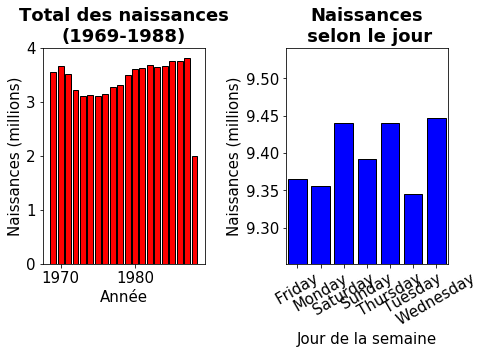

In [327]:
fig = plt.figure(figsize=(15,3))
plt.rcParams.update({'font.size': 15})
plt.grid(color='grey', linestyle='dotted')

# Pré-visualisation des données en fonction des années

birth_pt1 = birth_df3.pivot_table('births', index = 'year', aggfunc = "sum")
x1 = np.array(birth_pt1.index)
y1 = np.array(birth_pt1.births.values)
y1_min = np.min(y1)*0.99/1e6
y1_max = np.max(y1)*1.01/1e6
plot1 = plt.subplot(1, 3, 1)
plot1.bar(x1, y1/1e6, color = 'red', edgecolor='k')
plt.title("Total des naissances\n(1969-1988)",fontweight="bold")
ax1 = plt.xlabel("Année")
plt.ylabel("Naissances (millions)")
#plt.axis(1969 ,1680 , y1_min, y1_max])

# Valeur absolue globale du nombre de naissances pour chaque jour de la semaine

x2 = range(len(y2))
y2 = birth_pt.iloc[0].values + birth_pt.iloc[1].values + birth_pt.iloc[2].values
ind = birth_pt.iloc[0].index
y2_min = np.min(y2)*0.99/1e6
y2_max = np.max(y2)*1.01/1e6
plot2 = plt.subplot(1, 3, 2)
plot2.bar(x2, y2/1e6, color = 'blue', edgecolor='k', label='naissances' )
plt.title("Naissances\n selon le jour",fontweight="bold")
ax2 = plt.xlabel("Jour de la semaine")
plt.ylabel("Naissances (millions)")
plt.axis([-0.5, 6.5, y2_min, y2_max])
plt.xticks(range(7), ind, rotation=30)

plt.gcf().subplots_adjust(left = 0.1, bottom = 0.2, right = 0.7, top = 1.2, wspace = 0.5, hspace = 0.2)

plt.show()

# gestion des marges


__2. Courbes du nombre de naissances pour les décennies 60, 70 et 80.__

Remarque : les trois catégories choisies ne sont pas vraiment homogène puisque les données valides ne portent que sur les années 

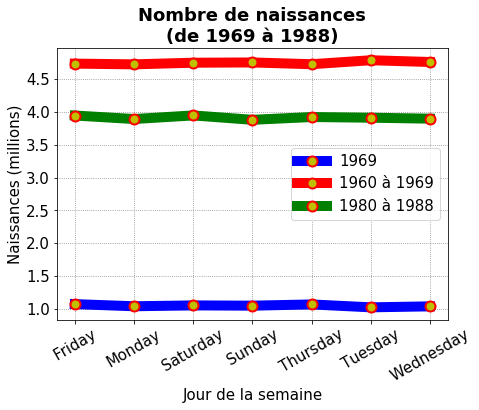

In [137]:
## Nombre de naissance pour chaque jour de la semaine pour les décénnies 60, 70 et 80

y_60 = birth_pt.iloc[0].values
y_70 = birth_pt.iloc[1].values
y_80 = birth_pt.iloc[2].values

fig = plt.figure(figsize=(7,5))

plt.plot(range(len(y_60)),(y_60)/1000000, \
         'o', c='blue', lw=10, ls='solid', \
         ms = 10, mfc = 'y', mec='red',  mew = 2, \
         label='1969',zorder = 5)
plt.plot(range(len(y_70)),(y_70)/1000000, \
         'o', c='red', lw=10, ls='solid', \
         ms = 10, mfc = 'y', mec='red',  mew = 2, \
         label='1960 à 1969',zorder = 10)
plt.plot(range(len(y_80)),(y_80)/1000000, \
         'o', c='green', lw=10, ls='solid', \
         ms = 10, mfc = 'y', mec='red',  mew = 2, \
         label='1980 à 1988',zorder = 15)

plt.title("Nombre de naissances\n(de 1969 à 1988)",fontweight="bold")
plt.xlabel("Jour de la semaine")
plt.ylabel("Naissances (millions)")
plt.rcParams.update({'font.size': 15})
plt.grid(color='grey', linestyle='dotted')
plt.xticks(range(7), ind, rotation=30)
plt.legend(loc='best')

plt.show()

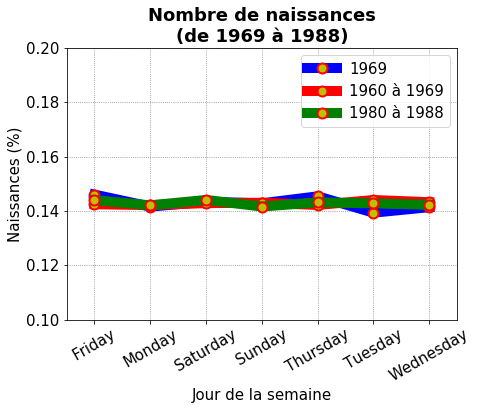

In [138]:
## Pourcentage des naissances pour chaque jour
# étiquettes de la valeur pour chaque barre


fig = plt.figure(figsize=(7,5))

plt.plot(range(len(y_60)),(y_60/np.sum(y_60)), \
         'o', c='blue', lw=10, ls='solid', \
         ms = 10, mfc = 'y', mec='red',  mew = 2, \
         label='1969',zorder = 5)
plt.plot(range(len(y_70)),(y_70/np.sum(y_70)), \
         'o', c='red', lw=10, ls='solid', \
         ms = 10, mfc = 'y', mec='red',  mew = 2, \
         label='1960 à 1969',zorder = 10)
plt.plot(range(len(y_80)),(y_80/np.sum(y_80)), \
         'o', c='green', lw=10, ls='solid', \
         ms = 10, mfc = 'y', mec='red',  mew = 2, \
         label='1980 à 1988',zorder = 15)

plt.title("Nombre de naissances\n(de 1969 à 1988)",fontweight="bold")
plt.xlabel("Jour de la semaine")
plt.ylabel("Naissances (%)")
plt.rcParams.update({'font.size': 15})
plt.axis([-0.5, 6.5, 0.1, 0.2])
plt.grid(color='grey', linestyle='dotted')
plt.xticks(range(7), ind, rotation=30)
plt.legend(loc='best')

plt.show()

In [139]:
mettre dans l'ordre les index et en français
mise en forme graphe

SyntaxError: invalid syntax (<ipython-input-139-88367ac4018f>, line 1)

In [118]:
print(np.array(range(1,32)))
print(np.array(range(birth_df.index.size)))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[    0     1     2 ... 14607 14608 14609]
